In [1]:
from env_2_stochastic_high import Environment3,StartandGoal,ImportDynamics,statetocor
import numpy as np

In [2]:
from QlearningAgent import QAgent

In [3]:
[startstate,goalstate]=StartandGoal()
numX=7
numY=10
numA=8
start_x,start_y=statetocor(startstate)
goal_x,goal_y=statetocor(goalstate)

In [4]:
T_min=2
T_max=11

In [5]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=5000
SuccessRateQ10K=[]
Time_horizon=[]

training_loops=10000
test_trials=1000

for ii in range(T_min,T_max):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(test_trials):
    
        #episode-start
        x=start_x
        y=start_y
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[x-1,y-1,:])
            [xp,yp,reward]=Environment3(x,y,action)
            x=xp
            y=yp
            if(x==goal_x and y==goal_y):
                score+=1
                break
    Time_horizon.append(ii)            
    SuccessRateQ10K.append(score/test_trials)

In [6]:
#Experimenting success rate of Q_Agent from T=1 to T-15 training loops=10000
SuccessRateQ20K=[]

training_loops=20000
test_trials=1000

for ii in range(T_min,T_max):
    T=ii
    #Retrieving action selection matrix from SophAgent
    QLearned=QAgent(T,training_loops)

    score=0
    for j in range(test_trials):
    
        #episode-start
        x=start_x
        y=start_y
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.argmax(QLearned[x-1,y-1,:])
            [xp,yp,reward]=Environment3(x,y,action)
            x=xp
            y=yp
            if(x==goal_x and y==goal_y):
                score+=1
                break
         
    SuccessRateQ20K.append(score/test_trials)

In [7]:
#Sophisticated Inference Agent

T_max=10

SuccessRateSI=[]
import numpy as np
ActionProb=np.zeros((T_max,numA,T_max-1));
input = np.loadtxt("ActionProb.txt", dtype='float64', delimiter='\t')
P=np.zeros((T_max,numA,T_max-1))
for i in range(T_max):
    P[i,:,:]=np.reshape(input[i,:], (numA, T_max-1), order='F')
    

#Trials using P
test_trials=1000
for ii in range(T_min,T_max+1):
    T=ii
    
    score=0
    for j in range(test_trials):
    
        #episode-start
        x=start_x
        y=start_y
        for i in range(0,T-1):
            kingsmoves=[0,1,2,3,4,5,6,7]
            action=np.random.choice([0,1,2,3,4,5,6,7],p=P[ii-1,:,i])
            [xp,yp,reward]=Environment3(x,y,action)
            x=xp
            y=yp
            if(x==goal_x and y==goal_y):
                score+=1
                break
         
    SuccessRateSI.append(score/test_trials)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


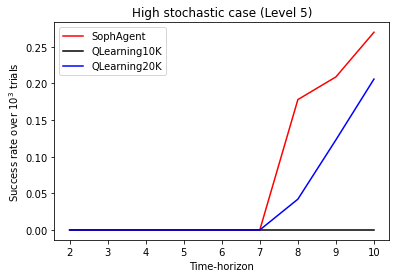

In [11]:
import matplotlib.pyplot as plt
plt.plot(Time_horizon,SuccessRateSI,color='red')
plt.plot(Time_horizon,SuccessRateQ10K,color='black')
plt.plot(Time_horizon,SuccessRateQ20K,color='blue')
plt.legend(["SophAgent","QLearning10K","QLearning20K"])
plt.title("High stochastic case (Level 5)")
plt.xlabel("Time-horizon")
plt.ylabel("Success rate over $10^3$ trials")
plt.savefig('ResultsLevel-5BB.eps',format='eps', dpi=500, bbox_inches='tight')